In [1]:
%matplotlib inline
import intake
import xarray as xr
import matplotlib
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
from esio import ice_plot
import dask

In [2]:
catalog_url = 'https://raw.githubusercontent.com/NicWayand/polar.pangeo.io-deploy/staging/deployments/polar.pangeo.io/image/catalog.yaml'

In [3]:
def test_plot(ds_SIT):
    ''' test spatial plot of SIT. Mean over all time dims and model dims.'''
    cmap_sic = matplotlib.colors.ListedColormap(sns.color_palette("Blues_r", 10))
    cmap_sic.set_bad(color = 'lightgrey')

    (f, ax1) = ice_plot.polar_axis()
    f.set_size_inches(10, 5)

    da = ds_SIT.mean_25km_1km.mean(dim=['model','init_end','fore_time']) 
    da.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                         transform=ccrs.PlateCarree(),
                                         cmap=cmap_sic,
                                           vmin=0,
                                           vmax=4,
                                 cbar_kwargs={'label':'Sea Ice Thickness (m)'})

### Default schedular 

In [4]:
ds_SIT = intake.Catalog(catalog_url).SIPN2_SIT.to_dask()
ds_SIT

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(8, 1, 8, 304, 448)>

/srv/conda/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 2min 11s, sys: 1min 13s, total: 3min 24s
Wall time: 4min 4s


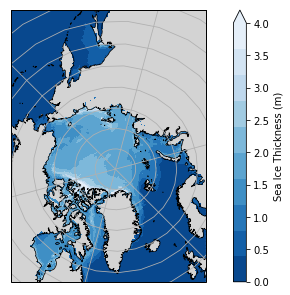

In [5]:
%time test_plot(ds_SIT)

### Multi thread

In [6]:
dask.config.set(scheduler='threads')

In [7]:
ds_SIT = intake.Catalog(catalog_url).SIPN2_SIT.to_dask()
ds_SIT

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(8, 1, 8, 304, 448)>

/srv/conda/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 2min 9s, sys: 1min 10s, total: 3min 19s
Wall time: 3min 31s


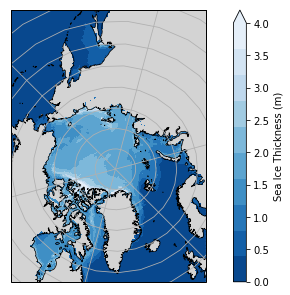

In [8]:
%time test_plot(ds_SIT)

### Single Machine

In [9]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:39300 Dashboard: /user/nicwayand/proxy/37028/status,Cluster Workers: 2 Cores: 2 Memory: 7.85 GB


In [10]:
ds_SIT = intake.Catalog(catalog_url).SIPN2_SIT.to_dask()
ds_SIT

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(8, 1, 8, 304, 448)>

CPU times: user 21.6 s, sys: 1.99 s, total: 23.6 s
Wall time: 5min 4s


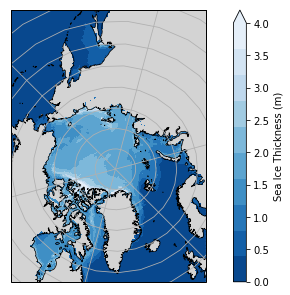

In [11]:
%time test_plot(ds_SIT)

### Distributed Cluster

In [12]:
from dask.distributed import Client, progress
from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=20)
cluster

In [13]:
client = Client(cluster)
client

Client Scheduler: tcp://10.28.0.54:44530 Dashboard: /user/nicwayand/proxy/36941/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [14]:
ds_SIT = intake.Catalog(catalog_url).SIPN2_SIT.to_dask()
ds_SIT

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(304, 448)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(8, 1, 8, 304, 448)>

CPU times: user 14.1 s, sys: 1.62 s, total: 15.7 s
Wall time: 3min 1s


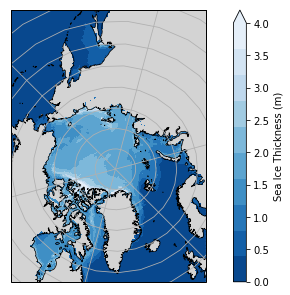

In [15]:
%time test_plot(ds_SIT)